In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw
import random

In [20]:
def eye_crop(img,mask,padding_ratio=0.75,min_maskratio=0.001):
    
    mask_ratio=np.sum(mask)/np.sum(np.ones_like(mask))    
    if mask_ratio<min_maskratio:
        raise Exception("minimum mask ratio not met")
    
    maskcoords=np.argwhere(mask)
    [y1,x1]=np.min(maskcoords,0)
    [y2,x2]=np.max(maskcoords,0)

    h,w,_=img.shape

    padding=int((x2-x1)*padding_ratio)
    
    y1=max(y1-padding,0)
    x1=max(x1-padding,0)
    
    y2=min(y2+padding,h)
    x2=min(x2+padding,w)
    
    cropped=img[y1:y2,x1:x2,:]
    
    return cropped

In [3]:
imgdir="/home/jay/postgrad-portfolio/gaze-correction/data/lapa/raw/LaPa/train/images"
labeldir="/home/jay/postgrad-portfolio/gaze-correction/data/lapa/raw/LaPa/train/labels"
landmarkdir="/home/jay/postgrad-portfolio/gaze-correction/data/lapa/raw/LaPa/train/landmarks"

In [4]:
imgpaths=[os.path.join(imgdir,i) for i in os.listdir(imgdir)]
imgpaths.sort()

labelpaths=[os.path.join(labeldir,i) for i in os.listdir(labeldir)]
labelpaths.sort()

landmarkpaths=[os.path.join(landmarkdir,i) for i in os.listdir(landmarkdir)]
landmarkpaths.sort()

In [39]:
imgpaths[:5]

['/home/jay/postgrad-portfolio/gaze-correction/data/lapa/raw/LaPa/train/images/10001436895_0.jpg',
 '/home/jay/postgrad-portfolio/gaze-correction/data/lapa/raw/LaPa/train/images/10003645676_0.jpg',
 '/home/jay/postgrad-portfolio/gaze-correction/data/lapa/raw/LaPa/train/images/10004446093_1.jpg',
 '/home/jay/postgrad-portfolio/gaze-correction/data/lapa/raw/LaPa/train/images/10004446093_17.jpg',
 '/home/jay/postgrad-portfolio/gaze-correction/data/lapa/raw/LaPa/train/images/10004446093_2.jpg']

In [40]:
labelpaths[:5]

['/home/jay/postgrad-portfolio/gaze-correction/data/lapa/raw/LaPa/train/labels/10001436895_0.png',
 '/home/jay/postgrad-portfolio/gaze-correction/data/lapa/raw/LaPa/train/labels/10003645676_0.png',
 '/home/jay/postgrad-portfolio/gaze-correction/data/lapa/raw/LaPa/train/labels/10004446093_1.png',
 '/home/jay/postgrad-portfolio/gaze-correction/data/lapa/raw/LaPa/train/labels/10004446093_17.png',
 '/home/jay/postgrad-portfolio/gaze-correction/data/lapa/raw/LaPa/train/labels/10004446093_2.png']

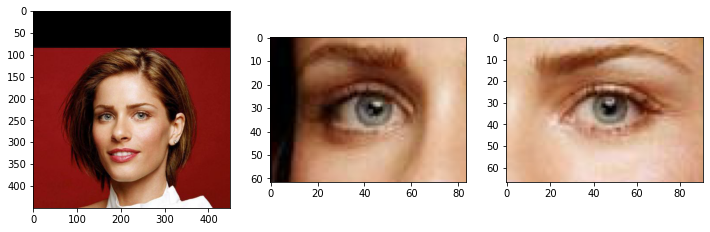

In [37]:
idx=random.choice(range(len(imgpaths)))

# idx=6541

img=np.array(Image.open(imgpaths[idx]))
label=np.array(Image.open(labelpaths[idx]))

lefteyemask=label==4
righteyemask=label==5

leftcrop=eye_crop(img,lefteyemask)
rightcrop=eye_crop(img,righteyemask)


plt.figure(figsize=(12,48))
plt.subplot(131).imshow(img)
plt.subplot(132).imshow(leftcrop)
plt.subplot(133).imshow(rightcrop)

In [38]:
idx

16063